In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords

In [2]:
df=pd.read_csv('data/reddit.csv')
df

,subreddit,selftext,title
0,relationships,My boyfriend (23M) got upset with me I don’t t...,Boyfriend expects me to tell him everything
1,relationships,\r\n\r\n\r\n\r\nI (f22) have always been blame...,Am i a bad child for having broken up my famil...
2,relationships,I (25 F) and my boyfriend (26 M) have been tog...,Boyfriend puked all over our bed when drunk
3,relationships,"She'll never admit it, but it really seems lik...",My girlfriend doesn't like me having a hobby
4,relationships,"As the title said, we had a conversation about...",I (24M) had a tough conversation with my GF (2...
...,...,...,...
2836,AmItheAsshole,I (14f) do paper rounds in my small town. Toda...,AITA for moving someone’s bins without their p...
2837,AmItheAsshole,Sorry for the bad formatting I'm on mobile.\r\...,AITA For Being Distrustful Of My Girlfriend?
2838,AmItheAsshole,Hi everybody. I’m posting this through my daug...,AITA for canceling a dinner party during it?
2839,AmItheAsshole,I (22f) and my friend (23f) have known each ot...,AITA for telling my friend to break up with he...


In [3]:
#Lets check for duplicates
df.drop_duplicates(['title'])
#so. All my data is garbage. brb. 
#I think I fixed the previous notebook. Lets restart the kernel here. 
#Somehow there are still about 60 duplicates. I don't want to look into it, lets just get rid of them. 

,subreddit,selftext,title
0,relationships,My boyfriend (23M) got upset with me I don’t t...,Boyfriend expects me to tell him everything
1,relationships,\r\n\r\n\r\n\r\nI (f22) have always been blame...,Am i a bad child for having broken up my famil...
2,relationships,I (25 F) and my boyfriend (26 M) have been tog...,Boyfriend puked all over our bed when drunk
3,relationships,"She'll never admit it, but it really seems lik...",My girlfriend doesn't like me having a hobby
4,relationships,"As the title said, we had a conversation about...",I (24M) had a tough conversation with my GF (2...
...,...,...,...
2836,AmItheAsshole,I (14f) do paper rounds in my small town. Toda...,AITA for moving someone’s bins without their p...
2837,AmItheAsshole,Sorry for the bad formatting I'm on mobile.\r\...,AITA For Being Distrustful Of My Girlfriend?
2838,AmItheAsshole,Hi everybody. I’m posting this through my daug...,AITA for canceling a dinner party during it?
2839,AmItheAsshole,I (22f) and my friend (23f) have known each ot...,AITA for telling my friend to break up with he...


In [4]:
df=df.drop_duplicates(['title'])
df=df.drop_duplicates(['selftext'])
df.shape

(2753, 3)

In [5]:
#lets get rid of nulls as well.  
df=df.dropna()
#now I need to save it again
df.to_csv('data/reddit_cleaned.csv',index=False)
df.shape

(2752, 3)

In [6]:
#We can take a loot at the wordcount and the character count for both titles and posts.  
word_count_text=[len(i.split()) for i in df['selftext'].tolist()]
word_count_title=[len(i.split()) for i in df['title'].tolist()]

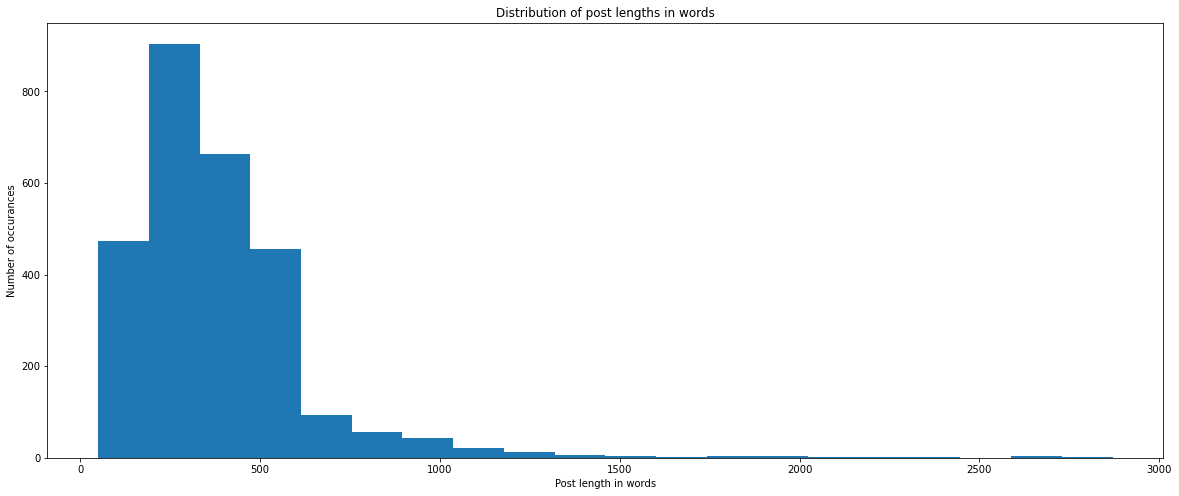

In [7]:
plt.figure(figsize=(20,8))
plt.hist(word_count_text,bins=20)

plt.xlabel('Post length in words') 
plt.ylabel('Number of occurances') 
plt.title("Distribution of post lengths in words");

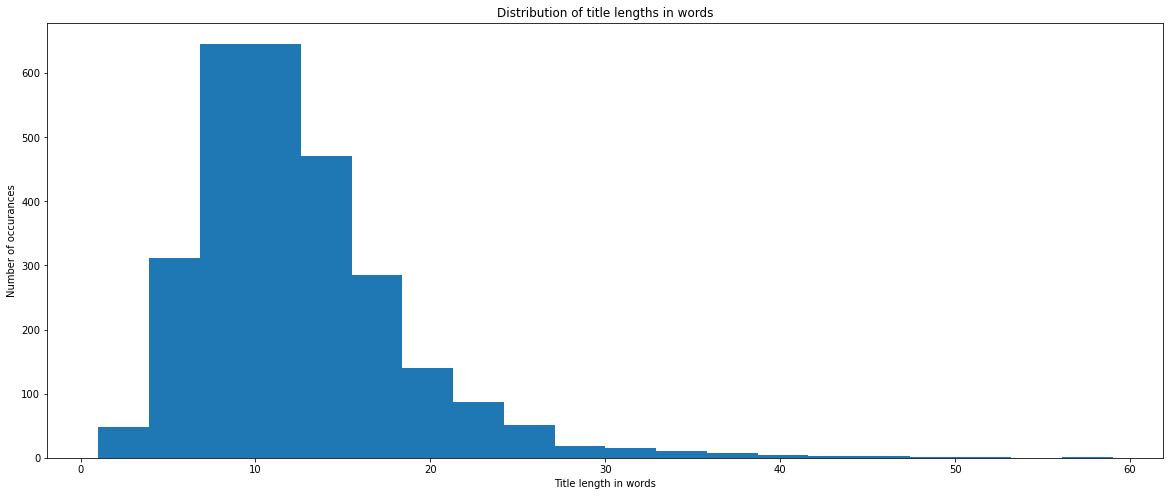

In [8]:
plt.figure(figsize=(20,8))
plt.hist(word_count_title,bins=20)

plt.xlabel('Title length in words') 
plt.ylabel('Number of occurances') 
plt.title("Distribution of title lengths in words");

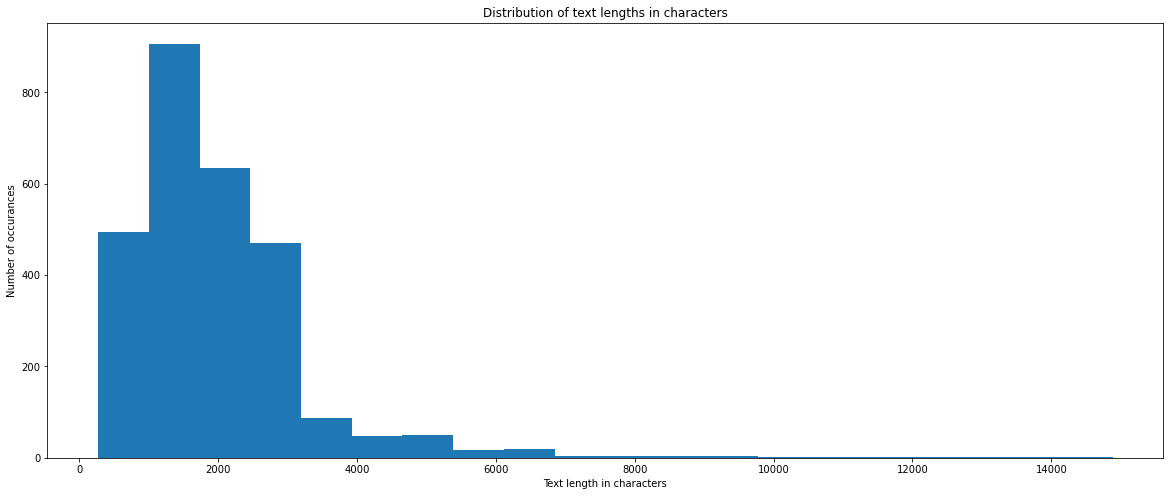

In [9]:
chara_count_text=[len(i) for i in df['selftext'].tolist()]
chara_count_title=[len(i) for i in df['title'].tolist()]
plt.figure(figsize=(20,8))
plt.hist(chara_count_text,bins=20)

plt.xlabel('Text length in characters') 
plt.ylabel('Number of occurances') 
plt.title("Distribution of text lengths in characters");

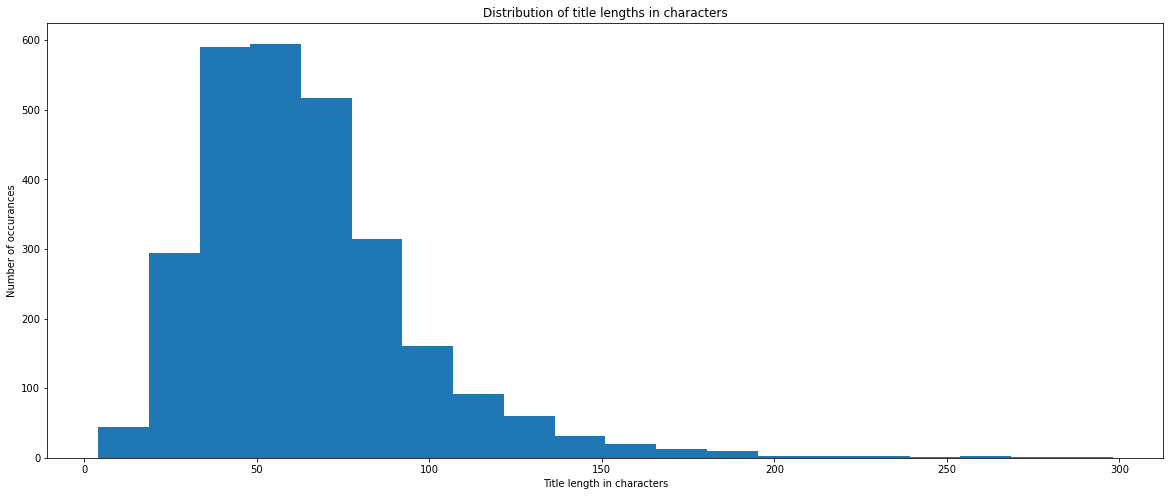

In [10]:
plt.figure(figsize=(20,8))
plt.hist(chara_count_title,bins=20)

plt.xlabel('Title length in characters') 
plt.ylabel('Number of occurances') 
plt.title("Distribution of title lengths in characters");

In [11]:
#Nothing out of the ordinary. Lets look at words. 
#It would make a lot of sense to get rid of the subreddit names and tl;dr expressions. 
#But first lets take a general look 
#I think it makes more sense to look at text and titles together. So lets transform them separately 
#and then merge the datasets
cvec=CountVectorizer(stop_words= 'english')
X=df['selftext']
Z=df['title']
cvec.fit(X)
X_t=cvec.transform(X)
X_df = pd.DataFrame(X_t.todense(), 
                          columns=cvec.get_feature_names_out())
cvec.fit(Z)
Z_t=cvec.transform(Z)
Z_df = pd.DataFrame(Z_t.todense(), 
                          columns=cvec.get_feature_names_out())
dff=pd.concat([X_df,Z_df],axis=1)
dff.shape

(2752, 20904)

In [12]:
dff.sum().sort_values(ascending = False).head(15)
#A lot of this needs to go. don, ve,didn, relationship (because it is the name of subreddit).

just            5299
like            5251
don             3833
said            3694
time            3610
told            3458
know            3245
want            3028
feel            2884
really          2749
ve              2628
didn            2601
friends         2281
relationship    2204
got             2138
dtype: int64

In [26]:
#This is ugly way to do stopwords
sw_list=stopwords.words('english')
for i in ['don','amp','x200b','ve','didn', 'relationship', 'relationships','aita','wibta','aitah','wibtah','tldr','tl','dr','asshole']:
    sw_list.append(i)
#sw_list

In [27]:
cvec=CountVectorizer(stop_words= sw_list,max_df=0.5,min_df=0.01)
X=df['selftext']
Z=df['title']
cvec.fit(X)
X_t=cvec.transform(X)
X_df = pd.DataFrame(X_t.todense(), 
                          columns=cvec.get_feature_names_out())
cvec.fit(Z)
Z_t=cvec.transform(Z)
Z_df = pd.DataFrame(Z_t.todense(), 
                          columns=cvec.get_feature_names_out())
dff=pd.concat([X_df,Z_df],axis=1)
dff.sum().sort_values(ascending = False).head(15)
#Looks pretty generic, but these are subreddits with relatively long posts, so it is expected. 
#I think I will very likely implement max_df in the future, after modeling things once or twice. 

feel       2884
really     2749
even       2436
friends    2281
got        2138
things     2113
go         2100
also       2051
back       2042
friend     1999
never      1870
going      1821
think      1787
work       1737
still      1717
dtype: int64

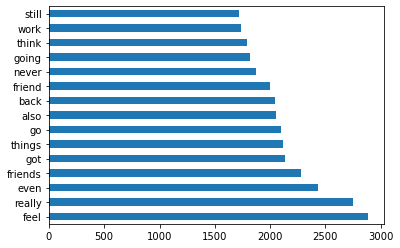

In [22]:
dff.sum().sort_values(ascending = False).head(15).plot(kind='barh');

In [16]:
#I think it is difficult to do any further EDA before looking at the models. 
#Overall I am happy with my data and want to take a look at the model results. 
#dff.to_csv('data/vectorised_words.csv',index=False)
#this took a lot of time. I will comment this to avoid useless work.
#It gets extra bad if you run two following cells, dff balloons to 420,000 columns and
#then you try to save it into csv

In [17]:
#Just curious
cvec=CountVectorizer(ngram_range=(2,2),stop_words=sw_list)
cvec.fit(X)
X_t=cvec.transform(X)
X_df = pd.DataFrame(X_t.todense(), 
                          columns=cvec.get_feature_names_out())
cvec.fit(Z)
Z_t=cvec.transform(Z)
Z_df = pd.DataFrame(Z_t.todense(), 
                          columns=cvec.get_feature_names_out())
dff=pd.concat([X_df,Z_df],axis=1)
dff.sum().sort_values(ascending = False).head(15)
#&amp;#x200B; is some sort of formatting. Lets get rid of it by 
#retroactively adding it to the stopwords

feel like        1036
even though       361
best friend       326
felt like         269
months ago        234
years ago         225
first time        204
feels like        201
mental health     176
next day          175
high school       174
one day           165
long distance     162
every time        159
year old          158
dtype: int64

In [36]:
cvec=CountVectorizer(ngram_range=(3,3),stop_words=sw_list)
cvec.fit(X)
X_t=cvec.transform(X)
X_df = pd.DataFrame(X_t.todense(), 
                          columns=cvec.get_feature_names_out())
cvec.fit(Z)
Z_t=cvec.transform(Z)
Z_df = pd.DataFrame(Z_t.todense(), 
                          columns=cvec.get_feature_names_out())
dff=pd.concat([X_df,Z_df],axis=1)
dff.sum().sort_values(ascending = False).head(15)
#x200b amp x200b and amp x200b amp appeared again. Other stuff looks normal.


long story short          61
makes feel like           49
get back together         43
mental health issues      31
spend time together       28
something along lines     28
couple weeks ago          27
english first language    26
couple months ago         24
one best friends          23
also feel like            23
two years ago             21
time feel like            20
two weeks ago             18
friend let call           18
dtype: int64

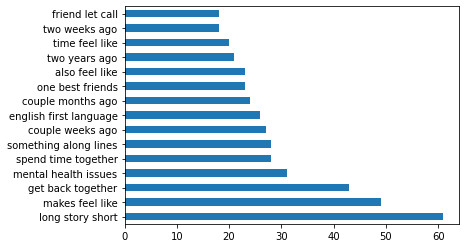

In [37]:
dff.sum().sort_values(ascending = False).head(15).plot(kind='barh');

In [34]:
#I want a dataset with less words. I want to exclude words that appear in more than 50% of the posts 
#and also ones that appeared in less than 1% of the posts/titles. 
cvec=CountVectorizer(stop_words= sw_list,max_df=0.5,min_df=0.003)
cvec.fit(X)
X_t=cvec.transform(X)
X_df = pd.DataFrame(X_t.todense(), 
                          columns=cvec.get_feature_names_out())
cvec.fit(Z)
Z_t=cvec.transform(Z)
Z_df = pd.DataFrame(Z_t.todense(), 
                          columns=cvec.get_feature_names_out())
dff=pd.concat([X_df,Z_df],axis=1)
dff.to_csv('data/words_few.csv',index=False)

dff.sum().sort_values(ascending = False).head(15)
dff.shape

(2752, 4219)

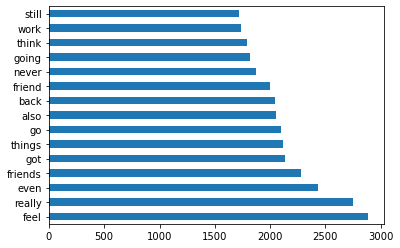

In [24]:
dff.sum().sort_values(ascending = False).head(15).plot(kind='barh');